In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam


In [12]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)

x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


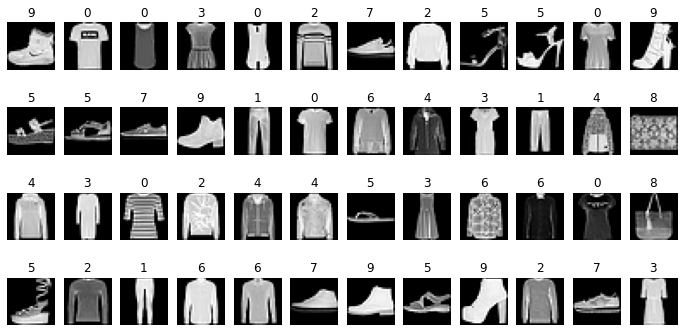

In [13]:
plt.figure(figsize = (12, 6))

for i in range(48):
  
  
  plt.subplot(4, 12, i + 1)
  plt.title(t_train[i])
  plt.imshow(x_train[i], cmap = 'gray')
  plt.axis('off')

plt.show()

# shuffle

In [14]:
s = np.arange(x_train.shape[0])

print(s)

np.random.shuffle(s)

x_train = x_train[s]
t_train = t_train[s]

print(s)

[    0     1     2 ... 59997 59998 59999]
[16102 34812  4777 ... 58571 52666 45801]


# train_validation_test split

In [15]:
temp_len = len(x_train)

TEST_SPLIT_RATIO = 0.15

test_nums = int(temp_len * TEST_SPLIT_RATIO)

x_test = x_train[:test_nums]
t_test = t_train[:test_nums]

x_train = x_train[test_nums:]
t_train = t_train[test_nums:]

print(x_test.shape, t_test.shape)

(9000, 28, 28) (9000,)


In [16]:
VAL_SPLIT_RATIO = 0.15

val_nums = int(temp_len * VAL_SPLIT_RATIO)

x_val = x_train[:val_nums]
t_val = t_train[:val_nums]

x_train = x_train[val_nums:]
t_train = t_train[val_nums:]
print(x_val.shape, t_val.shape)

(9000, 28, 28) (9000,)


# 정규화를 해야지..

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

# One hot encoding

In [8]:
from tensorflow.keras.utils import to_categorical

In [ ]:
t_train = to_categorical(t_train, 10)
t_test = to_categorical(t_test, 10)
t_val = to_categorical(t_val, 10)

print(t_train.shape, t_test.shape, t_val.shape)

(42000, 10) (9000, 10) (9000, 10)


# Model 생성

In [33]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28, 1)))

model.add(Dense(100, activation = 'relu'))

model.add(Dropout(0.75))

model.add(Dense(10, activation = 'softmax'))

In [34]:
model.compile(optimizer = SGD(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [35]:
from datetime import datetime

start = datetime.now()

hist = model.fit(x_train, t_train, epochs = 30, validation_data = (x_val, t_val))

end = datetime.now()

print('elapsed time ==>>', end-start)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2870 - accuracy: 0.5469 - val_loss: 0.7375 - val_accuracy: 0.7502
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9197 - accuracy: 0.6745 - val_loss: 0.6286 - val_accuracy: 0.7804
Epoch 3/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.8230 - accuracy: 0.7047 - val_loss: 0.5793 - val_accuracy: 0.7968
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7670 - accuracy: 0.7274 - val_loss: 0.5435 - val_accuracy: 0.8133
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7315 - accuracy: 0.7406 - val_loss: 0.5208 - val_accuracy: 0.8146
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7037 - accuracy: 0.7519 - val_loss: 0.4980 - val_accuracy: 0.8238
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6792 - accuracy: 0.7600 - val_loss: 0.4821 - val_accuracy:

In [28]:
model.evaluate(x_test, t_test)

282/282 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8749


[0.3516257107257843, 0.8748888969421387]

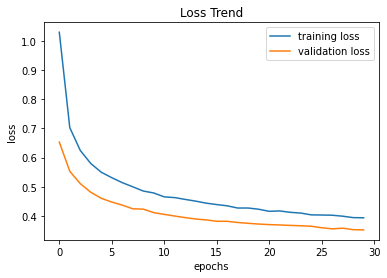

In [31]:
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

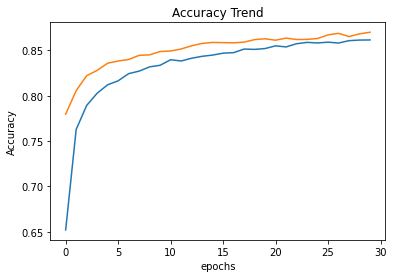

In [32]:
plt.title('Accuracy Trend')
plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation_accuracy')

# Functional API

In [52]:
x_train_ = x_train.T.reshape(784, -1).T
x_val_ = x_val.T.reshape(784, -1).T
x_test = x_test.T.reshape(784, -1).T

In [57]:
print(x_train_.shape, x_val_.shape, x_test.shape)
print(t_train.shape, t_val.shape, t_test.shape)

(42000, 784) (9000, 784) (9000, 784)
(42000,) (9000,) (9000,)


In [61]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

input_ = Input(shape = 784,)

x = Dense(100, activation = 'relu')(input_)

drop_out = Dropout(0.25)(x)

output_ = Dense(10, activation = 'softmax')(drop_out)

model = Model(inputs = input_, outputs = output_)

model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_26 (Dense)            (None, 100)               78500     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_27 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = SGD(0.01), metrics = ['accuracy'])

In [65]:
hist = model.fit(x_train_, t_train, epochs = 30, validation_data = (x_val_, t_val))

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9250 - accuracy: 0.6912 - val_loss: 0.6378 - val_accuracy: 0.7827
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6221 - accuracy: 0.7911 - val_loss: 0.5381 - val_accuracy: 0.8174
Epoch 3/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5581 - accuracy: 0.8130 - val_loss: 0.4962 - val_accuracy: 0.8289
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5142 - accuracy: 0.8255 - val_loss: 0.4693 - val_accuracy: 0.8337
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4937 - accuracy: 0.8298 - val_loss: 0.4529 - val_accuracy: 0.8414
Epoch 6/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4740 - accuracy: 0.8359 - val_loss: 0.4355 - val_accuracy: 0.8447
Epoch 7/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4602 - accuracy: 0.8418 - val_loss: 0.4317 - val_accuracy:

In [67]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduceLR = ReduceLROnPlateau(monitor = 'val_loss',
                             factor = 0.5,
                             patience = 5,
                             verbose = 1)

hist = model.fit(x_train_, t_train, epochs = 50, validation_split = 0.2, callbacks = [reduceLR])

Epoch 1/50
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3347 - accuracy: 0.8804 - val_loss: 0.3163 - val_accuracy: 0.8871 - lr: 0.0100
Epoch 2/50
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3307 - accuracy: 0.8810 - val_loss: 0.3171 - val_accuracy: 0.8854 - lr: 0.0100
Epoch 3/50
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3314 - accuracy: 0.8816 - val_loss: 0.3167 - val_accuracy: 0.8863 - lr: 0.0100
Epoch 4/50
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3281 - accuracy: 0.8818 - val_loss: 0.3145 - val_accuracy: 0.8879 - lr: 0.0100
Epoch 5/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3249 - accuracy: 0.8839 - val_loss: 0.3145 - val_accuracy: 0.8881 - lr: 0.0100
Epoch 6/50
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3233 - accuracy: 0.8842 - val_loss: 0.3184 - val_accuracy: 0.8862 - lr: 0.0100
Epoch 7/50
1050/1050 [==============================] - 3s

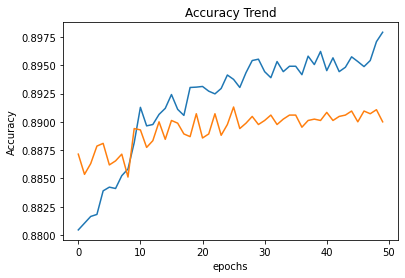

In [68]:
plt.title('Accuracy Trend')
plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.plot(hist.history['accuracy'], label = 'training accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation_accuracy')

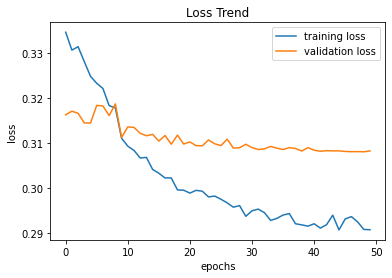

In [69]:
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.plot(hist.history['loss'], label = 'training loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()